In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание 1 </b>
    Загрузите файл HR.csv в pandas dataframe
</div>

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<div class="alert alert-info">
<b>Задание 2 </b>
    Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
</div>

In [4]:
df.mean() #средние значения

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [5]:
df.median() #медианы

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [24]:
df.mode().iloc[0] #моды

satisfaction_level         0.1
last_evaluation           0.55
number_project               4
average_montly_hours       135
time_spend_company           3
Work_accident                0
left                         0
promotion_last_5years        0
department               sales
salary                     low
Name: 0, dtype: object

In [8]:
df.min() #минимальные значения

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [25]:
df.max() #маскимальные значения

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [10]:
df.std() #среднее отклонение

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

<div class="alert alert-info">
<b>Задание 3 </b>
    Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
</div>

In [79]:
df.corr() #корреляционная матрица

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


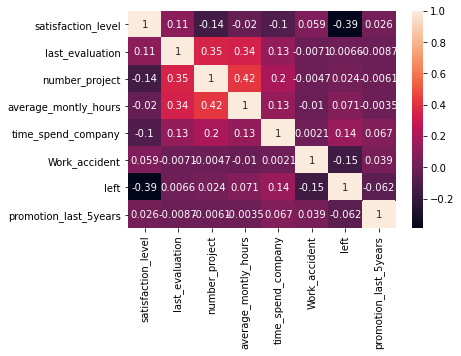

In [80]:
sns.heatmap(df.corr(), annot=True); #визуализация корреляционной матрицы в виде тепловой карты

In [29]:
df.corr().abs().min() #ищем совпадающие минимальные значения (по модулю) в корреляционной матрице 

satisfaction_level       0.020048
last_evaluation          0.006567
number_project           0.004741
average_montly_hours     0.003544
time_spend_company       0.002120
Work_accident            0.002120
left                     0.006567
promotion_last_5years    0.003544
dtype: float64

Две наименеескоррелированные переменные: <br>
- Стаж работы в компании в годах
- Переменная, показыающая роисходили ли несчастные случаи на рабочем месте с сотрудником

In [30]:
s = np.zeros(len(df.corr())) #заполняем диагональ корреляционной матрицы нулями для поиска максимальных значений, отличных от 1
df_c = df.corr()
np.fill_diagonal(df_c.values, s)

In [31]:
df_c.max() #ищем совпадающие максимальные значения (по модулю) в корреляционной матрице 

satisfaction_level       0.105021
last_evaluation          0.349333
number_project           0.417211
average_montly_hours     0.417211
time_spend_company       0.196786
Work_accident            0.058697
left                     0.144822
promotion_last_5years    0.067433
dtype: float64

Две самые скоррелированные переменные:
- Количество проектов, выполненных за время работы
- Среднее количество часов на рабочем месте в месяц

<div class="alert alert-info">
<b>Задание 4 </b>
    Рассчитайте сколько сотрудников работает в каждом департаменте.
</div>

In [32]:
# переименовываем один столбец для наглядности получаемого данных, 
# группируем исходные данные по столбцу 'department', 
# считаем количество столбцов в каждой получившейся группе и берем переименованный столбец
df_number_of_employees = (df.rename(columns={'satisfaction_level': 'number_of_employees'})
                          .groupby('department').
                          count()['number_of_employees'])
df_number_of_employees

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: number_of_employees, dtype: int64

<div class="alert alert-info">
<b>Задание 5 </b>
    Показать распределение сотрудников по зарплатам.
</div>

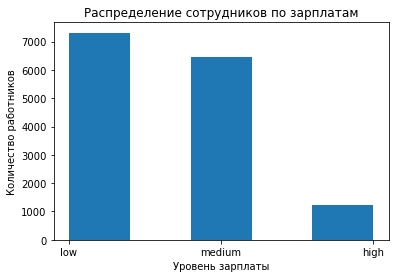

In [36]:
plt.hist(df.salary, bins=5);
plt.title('Распределение сотрудников по зарплатам');
plt.xlabel('Уровень зарплаты');
plt.ylabel('Количество работников');

<div class="alert alert-info">
<b>Задание 6 </b>
    Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
</div>

In [37]:
departments = list(df_number_of_employees.index) # выделяем список из названий всех департаментов

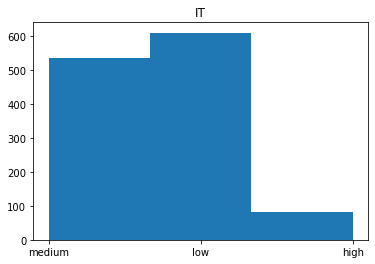

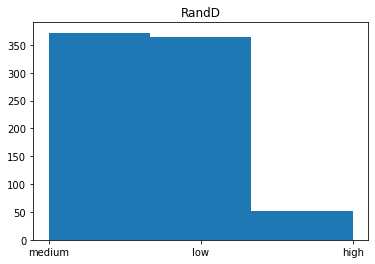

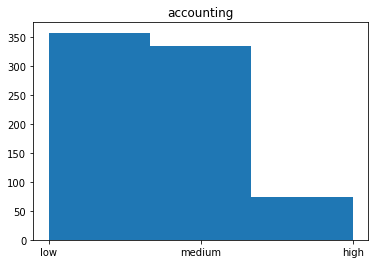

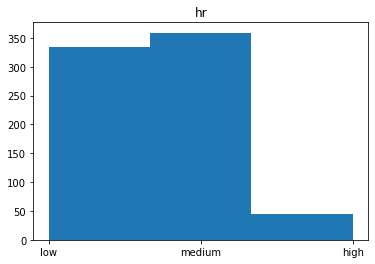

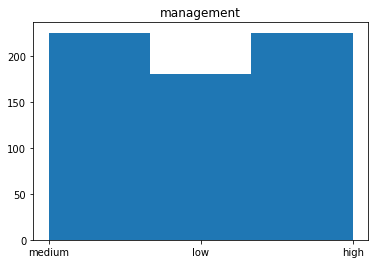

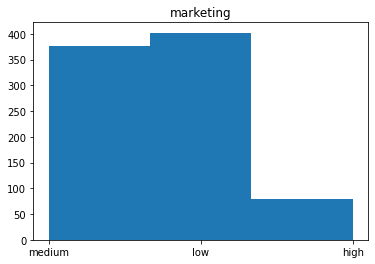

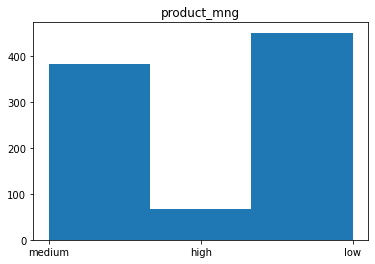

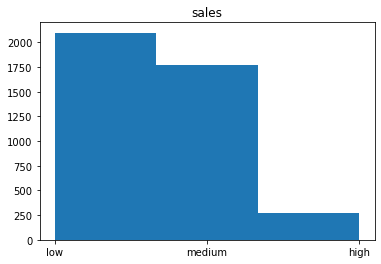

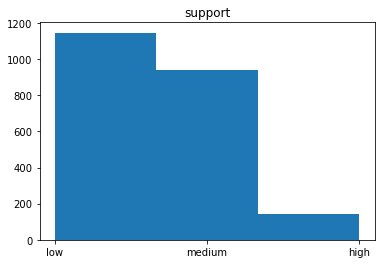

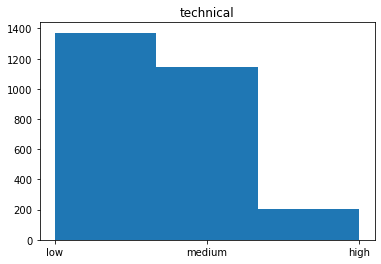

In [38]:
# строим распределения сотрудников по зарплатам в каждом департаменте по отдельности
for department in departments:
    df_dep = df[ df.department == department ]
    plt.hist(df_dep.salary, bins=3)
    plt.title(department)
    plt.show()

<div class="alert alert-info">
<b>Задание 7 </b>
    Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
</div>

In [40]:
# создаем датафреймы, в одном из которых будут работники с низким окладом, а в другом - с высоким
df_low = df[ df.salary == 'low' ]
df_high = df[ df.salary == 'high' ]

In [41]:
from scipy import stats # импортируем библиотеку для последующего теста гипотезы

<b>Формулируем нулевую и альтернативную гипотез:</b> <br>
H0 = average_montly_hours(high) > average_montly_hours(low) <br>
H1 = average_montly_hours(high) <= average_montly_hours(low) <br>
<br>
<b>Определяем уровень статистической значимости:</b> <br>
alpha = 0.05

In [49]:
# воспользуемся тестом Стьюднта для независимых выборок
t, p = stats.ttest_ind(df_low.average_montly_hours, df_high.average_montly_hours)
t, p/2 # односторонний тест

(0.7288680398062308, 0.23305117391336294)

p-value намного больше уровня значимости alpha, значит мы не можем отвергнуть нулевую гипотезу и утверждать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. <br><br>
Визулизация ниже показыват, что среднее время на работе у сотрудников с низким и высоким окладом примерно одинаково.

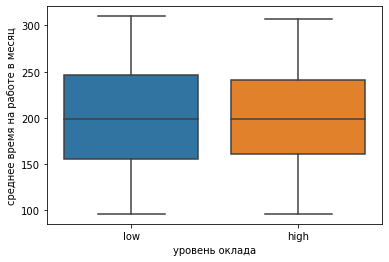

In [56]:
ax = sns.boxplot(data=[df_low.average_montly_hours, df_high.average_montly_hours])
plt.xticks([0,1], ['low', 'high']);
plt.ylabel('среднее время на работе в месяц');
plt.xlabel('уровень оклада');

<div class="alert alert-info">
<b>Задание 8 </b>
    Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): <br> <br>
    ● Доля сотрудников с повышением за последние 5 лет<br>
    ● Средняя степень удовлетворенности<br>
    ● Среднее количество проектов
    
</div>

In [58]:
# формируем 2 датафрейма, в одном из которых только уволенные сотрудники, в другом - неуволенные 
df_left = df[ df.left == 1 ]
df_not_left = df[ df.left == 0 ]

In [59]:
df_not_left_promotoin = df_not_left.rename(columns={'satisfaction_level': 'number_of_employees'}).groupby('promotion_last_5years').count()['number_of_employees']
print(f'Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников: {df_not_left_promotoin[1] / df_not_left.count()[0]}')

Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников: 0.026251312565628283


In [60]:
df_left_promotoin = df_left.rename(columns={'satisfaction_level': 'number_of_employees'}).groupby('promotion_last_5years').count()['number_of_employees']
print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников: {df_left_promotoin[1] / df_left.count()[0]}')

Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников: 0.005320638476617194


In [61]:
print(f'Средняя степень удовлетворенности среди не уволившихся сотрудников: {df_not_left.satisfaction_level.mean()}')

Средняя степень удовлетворенности среди не уволившихся сотрудников: 0.666809590479516


In [62]:
print(f'Средняя степень удовлетворенности среди уволившихся сотрудников: {df_left.satisfaction_level.mean()}')

Средняя степень удовлетворенности среди уволившихся сотрудников: 0.44009801176140917


In [63]:
print(f'Среднее количество проектов среди не уволившихся сотрудников: {df_not_left.number_project.median()}')

Среднее количество проектов среди не уволившихся сотрудников: 4.0


In [64]:
print(f'Среднее количество проектов среди уволившихся сотрудников: {df_left.number_project.median()}')

Среднее количество проектов среди уволившихся сотрудников: 4.0


<div class="alert alert-info">
<b>Задание 9 </b>
    Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки
</div>

In [65]:
# импортируем нужные библиотеки
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [66]:
# убираем ненужные столбцы и столбец, значения которого будет прогонозировать модель
df_for_LDA = df.iloc[:, :6].join(df.promotion_last_5years)

In [67]:
# деелим данные на тестовую и обучающую выборки
x_train, x_test, y_train, y_test = train_test_split(df_for_LDA, df.left, test_size=0.25, random_state=20)

In [68]:
# строим модель LDA
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [70]:
# вычисляем долю верных прогнозов
accuracy_score(y_test, y_pred)

0.772

In [75]:
# строим столбчатую диаграмму, отражающую качество построенной модели
df_1 = pd.DataFrame()
df_1['test'] = list(y_test.values)
df_1['pred'] = list(y_pred)

In [76]:
df_1['error'] = (df_1.test - df_1.pred).abs()
df_1.head()

,test,pred,error
0,0,0,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,1,0


In [77]:
df_1.error.value_counts()

0    2895
1     855
Name: error, dtype: int64

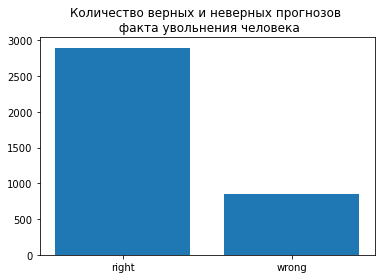

In [78]:
ax = plt.bar(list(df_1.error.value_counts().index), list(df_1.error.value_counts().values));
plt.xticks([0,1], ['right', 'wrong']);
plt.title('Количество верных и неверных прогнозов \n факта увольнения человека');